# Customer Segmentation using KMeans Clustering

**Objective**:

To segment customers into distinct groups based on their demographic and spending behaviors using k-Means clustering, with the goal of uncovering patterns and insights that can inform targeted marketing strategies and improve customer experiences.

This segmentation aims to:

1. Understand customer preferences and behaviors.
   
2. Optimize services and tailor marketing strategies for specific customer groups.
   
3. Enhance customer engagement and satisfaction.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [37]:
df.shape

(200, 5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Exploratory Data Analysis

In [39]:
df.duplicated().sum()

0

In [40]:
df.drop(columns='CustomerID').describe().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


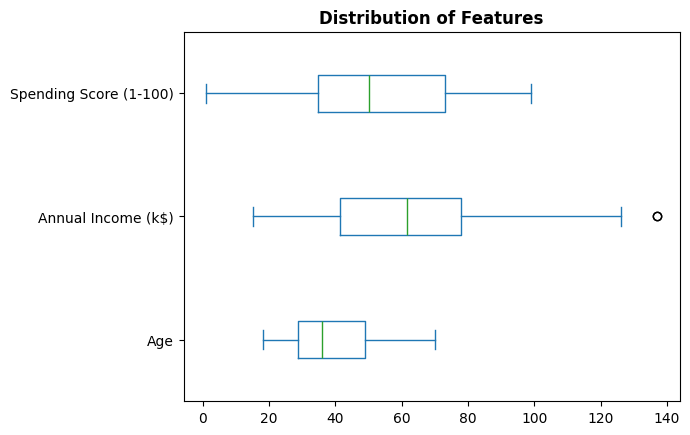

In [41]:
df.drop(columns=['CustomerID']).plot(kind='box', vert=False)
plt.title('Distribution of Features', fontweight='bold')
plt.show()

In [42]:
df.drop(columns=['CustomerID', 'Gender']).skew()

,0
Age,0.485569
Annual Income (k$),0.321843
Spending Score (1-100),-0.047220


- Based on the `describe()` output, boxplots, and skewness scores, it's clear that our dataset is clean and free from outliers.

- `Annual Income` contains an outlier, but this could indicate the presence of high-earning customers, as the *mean* and *median* are almost equal.

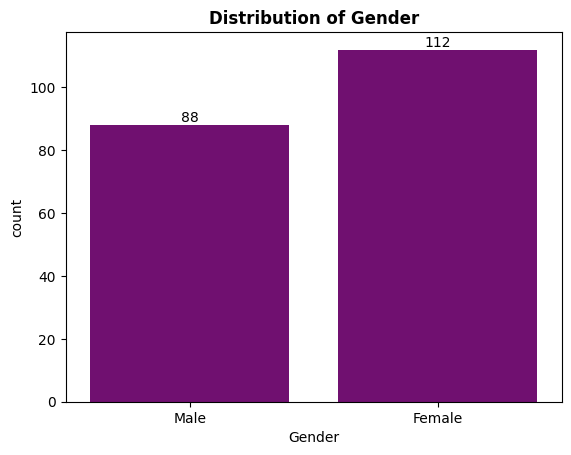

In [43]:
ax = sns.countplot(data=df, x='Gender', color='purple')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Gender', fontweight='bold')
plt.show()

- The **countplot** shows that the mall has more female customers than male.

In [44]:
corr_matrix = df.corr(numeric_only=True)

In [45]:
print(f"Correlation between Age and Annual Income: {corr_matrix.loc['Age', 'Annual Income (k$)']}")

Correlation between Age and Annual Income: -0.01239804273606026


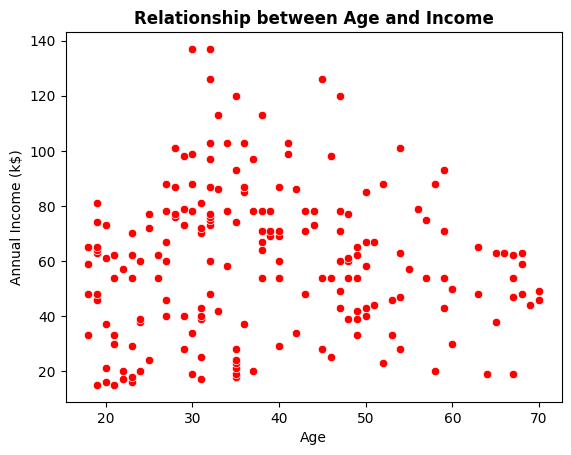

In [46]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', color='red')
plt.title('Relationship between Age and Income', fontweight='bold')
plt.show()

- The correlation coefficient of `-0.0124` indicates a very weak negative correlation between `Age` and `Income`, suggesting that they are not strongly correlated.

- This weak correlation is further supported by the scatter plot, which shows no clear linear relationship between the two variables.

- This infers that even a young person can earn a high income, and vice versa.

In [47]:
print(f"Correlation between Age and Spending Score: {corr_matrix.loc['Age', 'Spending Score (1-100)']}")

Correlation between Age and Spending Score: -0.32722684603909025


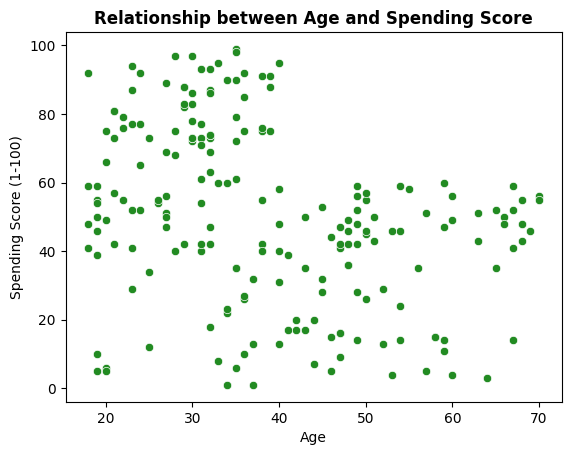

In [48]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', color='forestgreen')
plt.title('Relationship between Age and Spending Score', fontweight='bold')
plt.show()

- The correlation coefficient of `-0.3272` indicates a weak negative correlation between `Age` and `Spending Score`, suggesting a slight inverse relationship, but it is not strong.

- From the correlation value and scatter plot, it is evident that as age increases, the spending score tends to decrease.

- This suggests that younger and middle-aged customers tend to spend more in the mall.

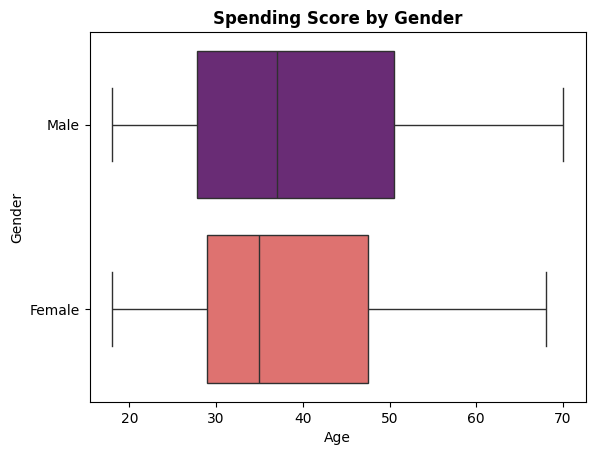

In [49]:
sns.boxplot(data=df, y='Gender', x='Age', hue='Gender', palette='magma')
plt.title('Spending Score by Gender', fontweight='bold')
plt.show()

- The age range of male customers is slightly wider (28 to 50) compared to female customers (30 to 48). However, there is no significant difference in the overall age range.

- Even though the mall has a lower male customer count, attracting male customers may be easier than attracting females, as the age range for males is broader.

- Targeting females in the age group of 30 to 48 is essential.

Let's perform a one-way ANOVA test to compare the incomes of male and female customers and determine if any significant difference exists.

- **Null Hypothesis (H0)**: There is no significant difference in the mean income between male and female customers.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean income between male and female customers.

In [50]:
from scipy.stats import f_oneway

f_stats, p_value = f_oneway(df[df['Gender'] == 'Male']['Annual Income (k$)'],
                             df[df['Gender'] == 'Female']['Annual Income (k$)'])
print('There is a significant difference in income by gender.') if p_value < 0.05 else print('There is no significant difference in income by gender.')

There is no significant difference in income by gender.


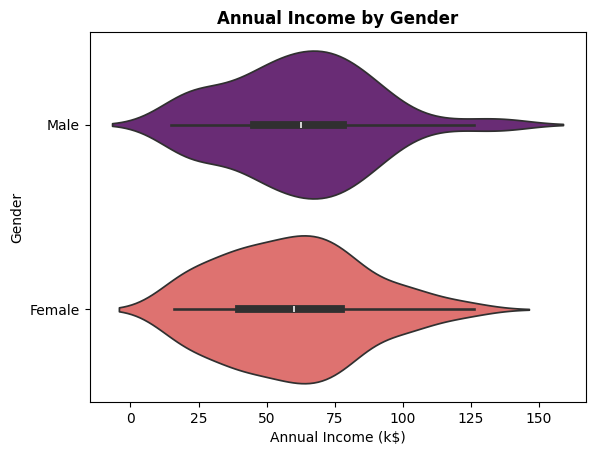

In [51]:
sns.violinplot(data=df, y='Gender', x='Annual Income (k$)', hue='Gender', palette='magma')
plt.title('Annual Income by Gender', fontweight='bold')
plt.show()

- The **Violinplot** shows a slight difference in `income` by `gender`, where the tail for `male` income is slightly extended. However, the **F-test** fails to provide enough evidence to prove a significant difference.

- The distribution indicates that most of the customers visiting the mall have an `Annual Income` in the range of $50k - $75k.

Next, let's perform a one-way ANOVA test to compare the spending scores of male and female customers and determine if any significant difference exists.

- **Null Hypothesis (H0)**: There is no significant difference in the mean spending score between male and female customers.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean spending score between male and female customers.

In [52]:
from scipy.stats import f_oneway

f_stats, p_value = f_oneway(df[df['Gender'] == 'Male']['Spending Score (1-100)'],
                             df[df['Gender'] == 'Female']['Spending Score (1-100)'])

msg = 'is a' if p_value < 0.05 else 'is no'
print(f'There {msg} significant difference in spending score by gender.')

There is no significant difference in spending score by gender.


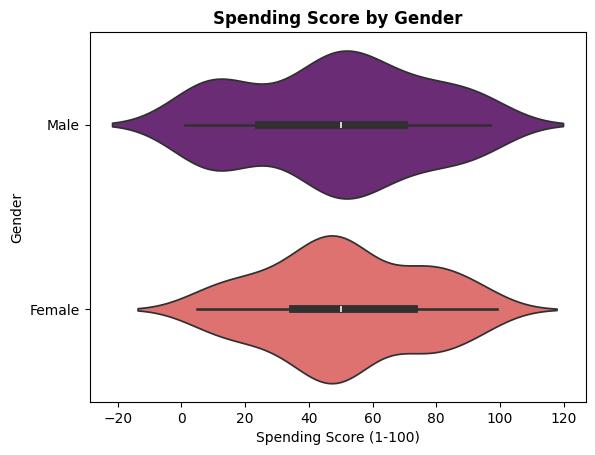

In [53]:
sns.violinplot(data=df, y='Gender', x='Spending Score (1-100)', hue='Gender', palette='magma')
plt.title('Spending Score by Gender', fontweight='bold')
plt.show()

- The **Violinplot** and **F-test** show that there is no significant difference in the `Spending Score` by `gender`.

- The distribution indicates that most customers, irrespective of their `Gender`, have a `Spending Score` in the range of 40 to 60.

### k-Means Clustering

#### Initial Visualization

In [54]:
print(f"Correlation between Annual Income and Spending Score: {corr_matrix.loc['Annual Income (k$)', 'Spending Score (1-100)']}")

Correlation between Annual Income and Spending Score: 0.009902848094037497


In [55]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Annual Income (k$)'], df['Spending Score (1-100)'])
if p_value < 0.05:
    print('Annual Income and Spending Score are Correlated!')
else:
    print('Annual Income and Spendings are not Correlated!')

Annual Income and Spendings are not Correlated!


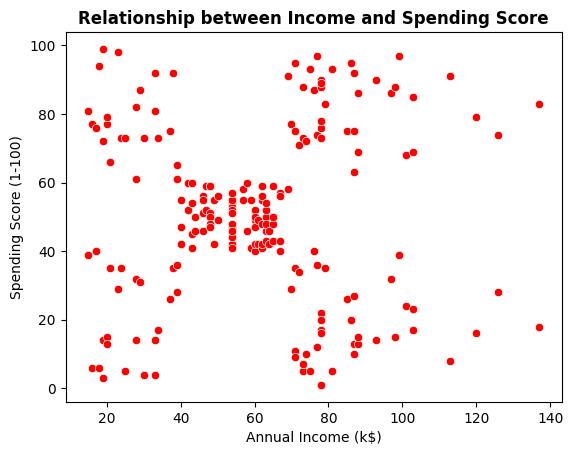

In [56]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', color='red')
plt.title('Relationship between Income and Spending Score', fontweight='bold')
plt.show()

- From the **Pearson Correlation**, we can conclude that there is no correlation between `Income` and `Spending Score`.

- The scatter plot reveals that the `Spending Scores` are clustered into 5 distinct groups. By performing proper customer segmentation, the performance of the mall can be improved.

#### Feature Selection

In [57]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Determine Optimal k-Value

In [59]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=73)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

### Plot the Elbow Chart

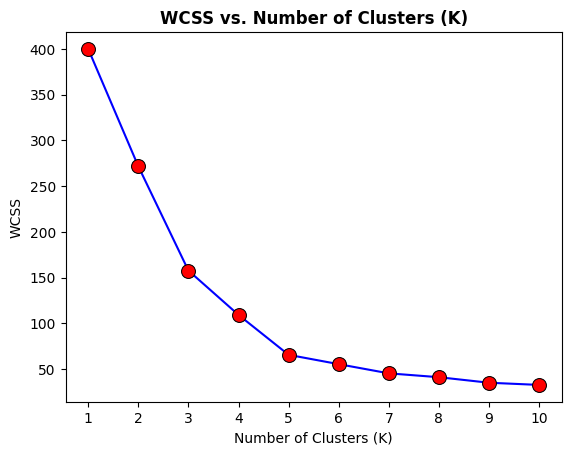

In [60]:
sns.lineplot(x=range(1, 11), y=wcss, color='blue', marker='o', markersize=10, markerfacecolor='red', markeredgecolor='black')
plt.title('WCSS vs. Number of Clusters (K)', fontweight='bold')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

##### Analyzing Clusters

- Based on the scatter plot created earlier, we can identify approximately **five distinct clusters** within the data.

- Referring to the elbow chart above, we notice that the **WCSS** value decreases significantly until **K = 5**. This suggests that **K = 5** is the optimal number of clusters for the given data.

### Build k-Means Model

In [62]:
kmeans = KMeans(n_clusters=5, random_state=73)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [63]:
df['Cluster'].unique()

array([4, 2, 1, 3, 0], dtype=int32)

In [64]:
for i in df['Cluster'].unique():
    df['Cluster'] = df['Cluster'].replace({i : f'Cluster {i+1}'})
df['Cluster'].unique()

array(['Cluster 5', 'Cluster 3', 'Cluster 2', 'Cluster 4', 'Cluster 1'],
      dtype=object)

In [65]:
centroids_scaled = kmeans.cluster_centers_
# Transform the centroids back to the original scale
centroids = scaler.inverse_transform(centroids_scaled)
centroids

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

#### Visualization of Clusters

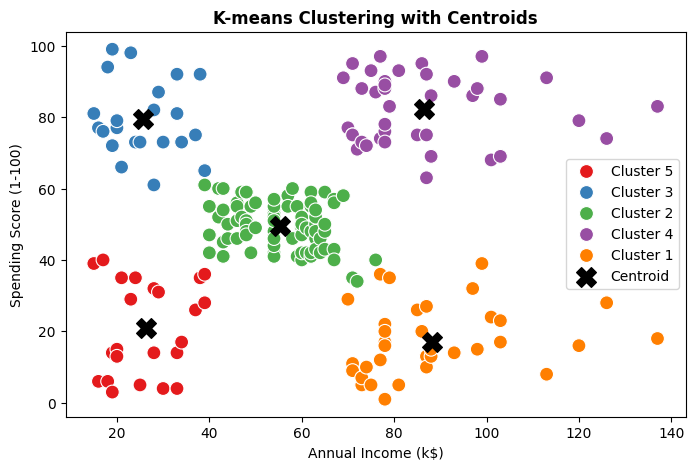

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200, label='Centroid')
plt.title('K-means Clustering with Centroids', fontweight='bold')
plt.legend()
plt.show()

#### Cluster Analysis

#### Distribution of Clusters by Age

To perform a one-way ANOVA test to compare the mean `Age` across the different clusters and determine if there is a significant difference between the clusters.

- **Null Hypothesis (H0)**: There is no significant difference in the mean age between the clusters.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean age between the clusters.


In [67]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform one-way ANOVA to test if there's a significant difference in Age across clusters
f_stats, p_value = f_oneway(df[df['Cluster'] == 'Cluster 1']['Age'],
                             df[df['Cluster'] == 'Cluster 2']['Age'],
                             df[df['Cluster'] == 'Cluster 3']['Age'],
                             df[df['Cluster'] == 'Cluster 4']['Age'],
                             df[df['Cluster'] == 'Cluster 5']['Age'])

# If p-value is less than 0.05, we reject the null hypothesis and show the mean ages for each cluster
if p_value < 0.05:
    order = df.groupby('Cluster')['Age'].mean().astype(int).sort_values(ascending=False)
    print(f'There is a significant difference between the mean age of the groups!\n\n{order}')
else:
    print('There is no significant difference between the means of the groups!')

There is a significant difference between the mean age of the groups!

Cluster
Cluster 5    45
Cluster 2    42
Cluster 1    41
Cluster 4    32
Cluster 3    25
Name: Age, dtype: int64


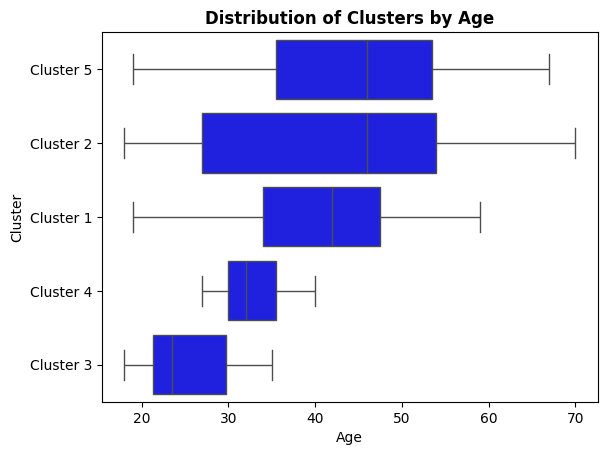

In [68]:
sns.boxplot(data=df, x='Age', y='Cluster', color='blue', order=order.index)
plt.title('Distribution of Clusters by Age', fontweight='bold')
plt.show()

- From the above statistical test and boxplot, it is clear that **Clusters 1, 4, and 5** consist of **middle-aged** customers, with their `Spending Scores` being relatively average.

- On the other hand, **Clusters 2 and 3** represent customers who are primarily **young adults and early middle-aged**.

#### Distribution of Clusters by Gender

Let's perform a Chi-squared test of independence to determine if there is a significant association between `Gender` and `Cluster`.

- **Null Hypothesis (H0)**: There is no significant association between `Gender` and `Cluster`.
- **Alternative Hypothesis (H1)**: There is a significant association between `Gender` and `Cluster`.

In [69]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df['Cluster'], df['Gender'])
chi2, p_value, dof, expected = chi2_contingency(cont_table)

if p_value <= 0.05:
    print("Reject the null hypothesis: There is a significant association between Gender and Cluster.")
else:
    print("Fail to reject the null hypothesis: No significant association between Gender and Cluster.")

Fail to reject the null hypothesis: No significant association between Gender and Cluster.


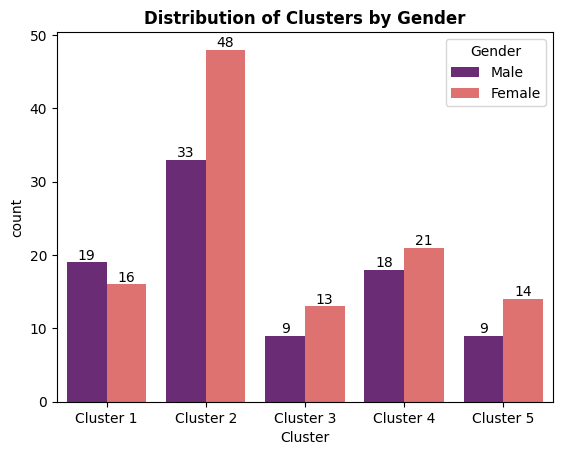

In [70]:
order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
ax = sns.countplot(data=df, x='Cluster', hue='Gender', palette='magma', order=order)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Clusters by Gender', fontweight='bold')
plt.show()

- Based on the **Chi-squared test of independence**, we fail to reject the null hypothesis, suggesting that there is no significant association between `Gender` and `Cluster`.

- However, the **count plot** reveals that the number of **female** customers is slightly higher than the number of **male** customers across all clusters, even though the statistical test did not provide enough evidence to confirm a significant association.

#### Conclusion:
- Based on the above observations, we can conclude that:
    - **Cluster 1**: **Average Spender** - Middle-aged individuals with average spending and average income.
    - **Cluster 2**: **High Spender** - Early middle-aged individuals with high spending and high income.
    - **Cluster 3**: **Spender** - Young adults with high spending but low income.
    - **Cluster 4**: **Earners** - Middle-aged individuals with low spending but high income.
    - **Cluster 5**: **Savers** - Middle-aged individuals with low spending and low income.